# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import datetime as dt
from datetime import datetime
import calendar

In [2]:
# To ensure the created charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path=r'C:\Users\sruth\OneDrive\Desktop\Career Foundry\Data Immersion\A6-Advanced Analytics & Dashboard design\6.2 Exploring Relationships'

In [4]:
df_bank=pd.read_csv(os.path.join(path,'Data','Prepared Data','Bank Transactions.csv'))

# 2.Explore Data

In [5]:
df_bank.head(16)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,15:38:32,459.00
1,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.00
2,T5,C9031234,24/3/88,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.50
3,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,00:16:46,566.00
4,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,23:22:17,148.00
5,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,05:33:45,833.00
6,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,05:27:26,289.11
7,T11,C5430833,22/7/82,M,MOHALI,48429.49,2/8/16,08:42:13,259.00
8,T13,C6339347,13/6/78,M,AHMEDABAD,32274.78,2/8/16,08:37:14,12300.00
9,T14,C8327851,5/1/92,F,THANE,59950.44,1/8/16,23:31:46,50.00


In [6]:
df_bank.shape

(660304, 9)

In [7]:
df_bank.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [8]:
df_bank.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime             object
TransactionAmount (INR)    float64
dtype: object

In [7]:
# convert CustomerDOB from string to date format
df_bank['CustomerDOB'] = pd.to_datetime(df_bank['CustomerDOB'])

In [10]:
df_bank['CustomerDOB']

0        1996-11-26
1        1973-09-14
2        1988-03-24
3        1992-01-26
4        1982-01-27
            ...    
660299   1980-05-24
660300   1992-11-19
660301   1990-08-04
660302   1989-05-18
660303   1984-05-03
Name: CustomerDOB, Length: 660304, dtype: datetime64[ns]

In [13]:
df_bank.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate                    object
TransactionTime                    object
TransactionAmount (INR)           float64
dtype: object

In [60]:
dt.datetime.today()

datetime.datetime(2023, 5, 15, 14, 10, 26, 868620)

In [8]:
# create a new column Age from the existing column CustomerDOB
df_bank['Age'] = (dt.datetime.today() - df_bank['CustomerDOB']).dt.days/365

In [12]:
df_bank.head(16)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,15:38:32,459.00,26.482192
1,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.00,49.698630
2,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.50,35.164384
3,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,00:16:46,566.00,31.320548
4,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,23:22:17,148.00,41.323288
5,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,05:33:45,833.00,35.093151
6,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,05:27:26,289.11,38.920548
7,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2/8/16,08:42:13,259.00,40.841096
8,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2/8/16,08:37:14,12300.00,44.950685
9,T14,C8327851,1992-05-01,F,THANE,59950.44,1/8/16,23:31:46,50.00,31.057534


In [74]:
df_bank.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate                    object
TransactionTime                    object
TransactionAmount (INR)           float64
Age                               float64
dtype: object

In [9]:
df_bank['Age'].value_counts(dropna=False)

 NaN          38772
 34.410959      501
 33.394521      458
 33.410959      390
 44.487671      378
              ...  
-40.046575        1
-28.846575        1
-28.213699        1
-20.893151        1
-42.183562        1
Name: Age, Length: 15136, dtype: int64

In [ ]:
# Due to NA values in CustomerDOB, some of the entries in 'Age' are blank.
# Additionally, some DOBs were misquoted as greater than the current date.
# So Imputing those values as 0 for further analysis.

In [10]:
#Imputing blank values in Age as 0 
df_bank['Age'].fillna(0,inplace=True)

In [11]:
df_bank['Age'].value_counts(dropna=False)

 0.000000     38772
 34.410959      501
 33.394521      458
 33.410959      390
 44.487671      378
              ...  
-40.046575        1
-28.846575        1
-28.213699        1
-20.893151        1
-42.183562        1
Name: Age, Length: 15136, dtype: int64

In [12]:
# some DOBs were misquoted as greater than the current date.So the age is in -ve values.So inputing those values to 0
df_bank.loc[df_bank['Age']<0,'Age']=0

In [13]:
df_bank['Age'].value_counts(dropna=False)

0.000000     94222
34.410959      501
33.394521      458
33.410959      390
44.487671      378
             ...  
18.468493        1
27.879452        1
21.947945        1
26.854795        1
7.515068         1
Name: Age, Length: 9301, dtype: int64

In [20]:
df_bank.head(16)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,15:38:32,459.00,26.482192
1,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.00,49.698630
2,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.50,35.164384
3,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,00:16:46,566.00,31.320548
4,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,23:22:17,148.00,41.323288
5,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,05:33:45,833.00,35.093151
6,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,05:27:26,289.11,38.920548
7,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2/8/16,08:42:13,259.00,40.841096
8,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2/8/16,08:37:14,12300.00,44.950685
9,T14,C8327851,1992-05-01,F,THANE,59950.44,1/8/16,23:31:46,50.00,31.057534


In [14]:
# Converting Age from Float64 to int 64(rounded)
df_bank['Age']=df_bank['Age'].round().astype('int64')


In [22]:
df_bank.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,15:38:32,459.00,26
1,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,15:38:34,2060.00,50
2,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2/8/16,02:19:16,1762.50,35
3,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,00:16:46,566.00,31
4,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,23:22:17,148.00,41
5,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,05:33:45,833.00,35
6,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,05:27:26,289.11,39
7,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2/8/16,08:42:13,259.00,41
8,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2/8/16,08:37:14,12300.00,45
9,T14,C8327851,1992-05-01,F,THANE,59950.44,1/8/16,23:31:46,50.00,31


In [23]:
df_bank.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate                    object
TransactionTime                    object
TransactionAmount (INR)           float64
Age                                 int64
dtype: object

In [24]:
df_bank['TransactionDate'].value_counts(dropna=False)

7/8/16      17397
13/8/16     17391
3/9/16      17033
6/8/16      17017
4/9/16      16917
14/8/16     16460
10/9/16     16378
11/9/16     16167
15/8/16     15183
21/8/16     14633
2/9/16      14292
12/8/16     14085
1/9/16      14051
27/8/16     13875
20/8/16     13613
10/8/16     13560
9/8/16      13520
11/8/16     13506
8/9/16      13499
28/8/16     13476
17/8/16     13431
9/9/16      13407
5/8/16      13250
2/8/16      13248
7/9/16      13239
5/9/16      13215
8/8/16      13045
4/8/16      13024
1/8/16      13015
3/8/16      12969
13/9/16     12805
12/9/16     12756
16/8/16     12649
14/9/16     12566
31/8/16     12372
6/9/16      12287
15/9/16     12274
18/8/16     12172
25/8/16     11750
19/8/16     11607
22/8/16     11516
24/8/16     11402
26/8/16     11166
23/8/16     10834
30/8/16     10736
29/8/16     10414
18/9/16      9270
26/9/16      7828
25/9/16      5221
27/9/16      4651
22/9/16      4357
21/10/16     2300
23/9/16      2239
30/9/16      1235
16/10/16        1
Name: Tran

In [15]:
# Replaced wrong transaction date 0 to 1/1/2016,as all transactions are in 2016
df_bank['TransactionDate'] = df_bank['TransactionDate'].replace([0], ['1/1/2016'])

In [26]:
df_bank['TransactionDate'].value_counts(dropna=False)

7/8/16      17397
13/8/16     17391
3/9/16      17033
6/8/16      17017
4/9/16      16917
14/8/16     16460
10/9/16     16378
11/9/16     16167
15/8/16     15183
21/8/16     14633
2/9/16      14292
12/8/16     14085
1/9/16      14051
27/8/16     13875
20/8/16     13613
10/8/16     13560
9/8/16      13520
11/8/16     13506
8/9/16      13499
28/8/16     13476
17/8/16     13431
9/9/16      13407
5/8/16      13250
2/8/16      13248
7/9/16      13239
5/9/16      13215
8/8/16      13045
4/8/16      13024
1/8/16      13015
3/8/16      12969
13/9/16     12805
12/9/16     12756
16/8/16     12649
14/9/16     12566
31/8/16     12372
6/9/16      12287
15/9/16     12274
18/8/16     12172
25/8/16     11750
19/8/16     11607
22/8/16     11516
24/8/16     11402
26/8/16     11166
23/8/16     10834
30/8/16     10736
29/8/16     10414
18/9/16      9270
26/9/16      7828
25/9/16      5221
27/9/16      4651
22/9/16      4357
21/10/16     2300
23/9/16      2239
30/9/16      1235
16/10/16        1
Name: Tran

In [16]:
# convert TransactionDate from string to date format
df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'])

In [28]:
df_bank['TransactionDate'].value_counts(dropna=False)

2016-07-08    17397
2016-08-13    17391
2016-03-09    17033
2016-06-08    17017
2016-04-09    16917
2016-08-14    16460
2016-10-09    16378
2016-11-09    16167
2016-08-15    15183
2016-08-21    14633
2016-02-09    14292
2016-12-08    14085
2016-01-09    14051
2016-08-27    13875
2016-08-20    13613
2016-10-08    13560
2016-09-08    13520
2016-11-08    13506
2016-08-09    13499
2016-08-28    13476
2016-08-17    13431
2016-09-09    13407
2016-05-08    13250
2016-02-08    13248
2016-07-09    13239
2016-05-09    13215
2016-08-08    13045
2016-04-08    13024
2016-01-08    13015
2016-03-08    12969
2016-09-13    12805
2016-12-09    12756
2016-08-16    12649
2016-09-14    12566
2016-08-31    12372
2016-06-09    12287
2016-09-15    12274
2016-08-18    12172
2016-08-25    11750
2016-08-19    11607
2016-08-22    11516
2016-08-24    11402
2016-08-26    11166
2016-08-23    10834
2016-08-30    10736
2016-08-29    10414
2016-09-18     9270
2016-09-26     7828
2016-09-25     5221
2016-09-27     4651


In [17]:
# Extract month from TransactionDate
df_bank['month of transaction'] = pd.DatetimeIndex(df_bank['TransactionDate']).month

In [30]:
df_bank.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,month of transaction
0,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.00,26,2
1,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,15:38:34,2060.00,50,2
2,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,02:19:16,1762.50,35,2
3,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,00:16:46,566.00,31,2
4,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,23:22:17,148.00,41,2
5,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,05:33:45,833.00,35,2
6,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,05:27:26,289.11,39,2
7,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2016-02-08,08:42:13,259.00,41,2
8,T13,C6339347,1978-06-13,M,AHMEDABAD,32274.78,2016-02-08,08:37:14,12300.00,45,2
9,T14,C8327851,1992-05-01,F,THANE,59950.44,2016-01-08,23:31:46,50.00,31,1


In [31]:
df_bank['month of transaction'].value_counts(dropna=False)

8     271224
9      99373
10     32239
7      30636
3      30002
4      29941
11     29673
6      29304
2      27540
1      27066
12     26841
5      26465
Name: month of transaction, dtype: int64

In [18]:
# convert month number to month name
df_bank['Trans_monthname'] = df_bank['month of transaction'].apply(lambda x: calendar.month_abbr[x])

In [19]:
df_bank['month of transaction'].value_counts(dropna=False)

8     271224
9      99373
10     32239
7      30636
3      30002
4      29941
11     29673
6      29304
2      27540
1      27066
12     26841
5      26465
Name: month of transaction, dtype: int64

In [34]:
df_bank.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Age',
       'month of transaction', 'Trans_monthname'],
      dtype='object')

In [20]:
#Create a subset 
df_bank_sub=df_bank[[ 'Age','month of transaction','CustAccountBalance', 'TransactionAmount (INR)']]

In [21]:
# create a new df with exclude age 0
df_bank_sub= df_bank_sub[df_bank_sub['Age'] != 0]

In [22]:
df_bank_sub.head(10)

,Age,month of transaction,CustAccountBalance,TransactionAmount (INR)
0,27,2,17874.44,459.00
1,50,2,866503.21,2060.00
2,35,2,6714.43,1762.50
3,31,2,973.46,566.00
4,41,2,95075.54,148.00
5,35,2,14906.96,833.00
6,39,2,4279.22,289.11
7,41,2,48429.49,259.00
8,45,2,32274.78,12300.00
9,31,1,59950.44,50.00


# 3. Exploring Relationships

# Correlation

In [23]:
# create a correlation matrix
df_bank_sub.corr()

,Age,month of transaction,CustAccountBalance,TransactionAmount (INR)
Age,1.000000,-0.002350,0.134478,0.065254
month of transaction,-0.002350,1.000000,0.005250,-0.003757
CustAccountBalance,0.134478,0.005250,1.000000,0.057454
TransactionAmount (INR),0.065254,-0.003757,0.057454,1.000000


# Create a correlation heatmap using matplotlib

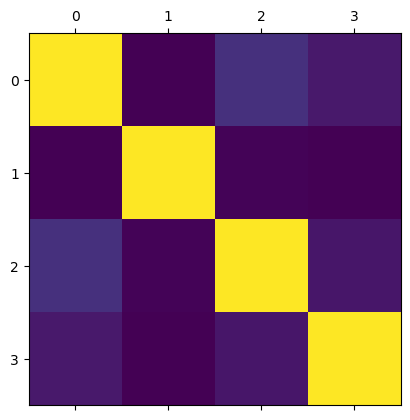

In [24]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_bank_sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

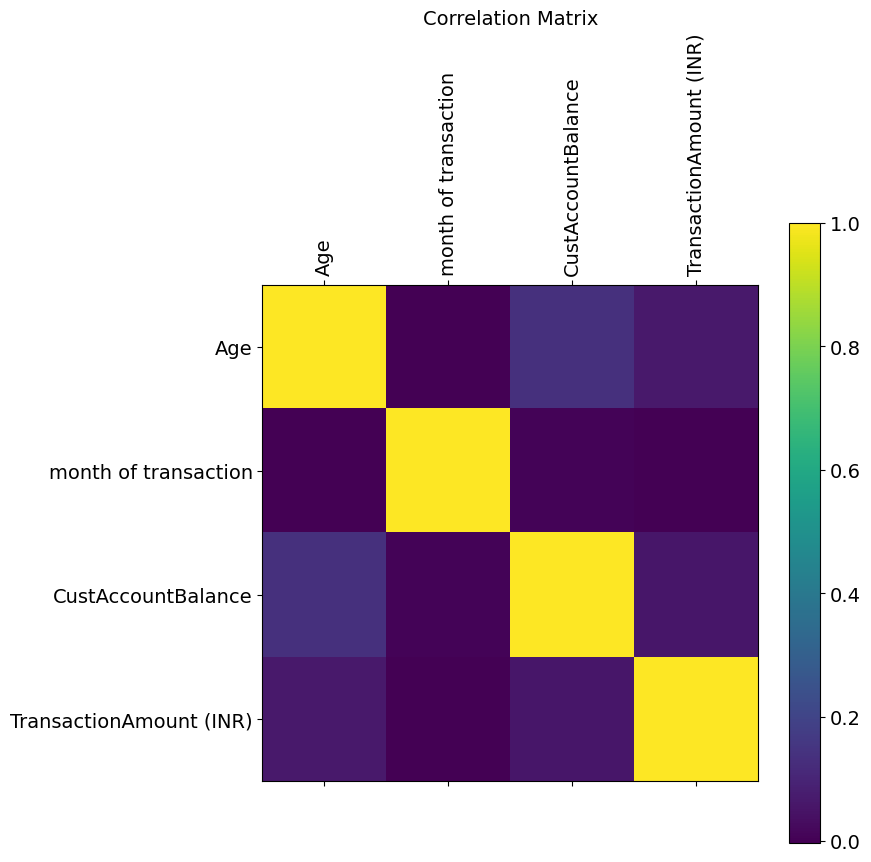

In [25]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_bank_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_bank_sub.shape[1]), df_bank_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_bank_sub.shape[1]), df_bank_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Create a correlation heatmap using seaborn:

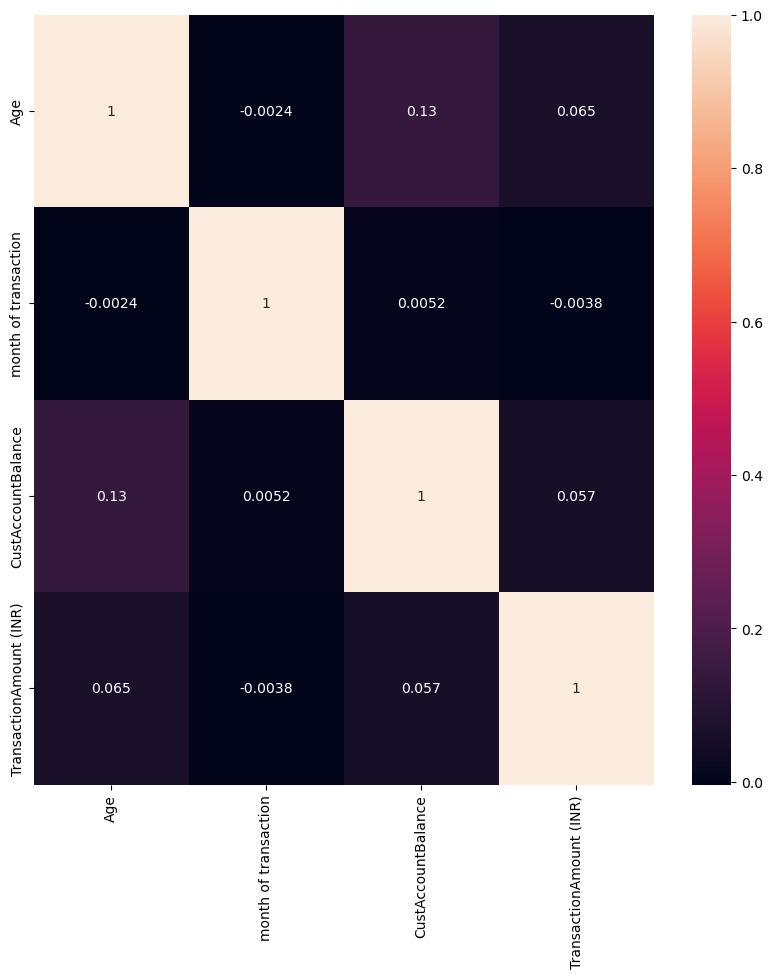

In [26]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_bank_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [ ]:
# 0.066 coefficient indicates no/weak relationship between transaction amount & the customer account balance
#0.0097 coefficient indicates no/weak relationship between Age & transaction amount
#0.014  coefficient indicates no/weak relationship between Age & cust Account balance
#0.39  coefficient indicates moderate relationship between Age & month of transaction.But it doesnt make any sense.
#0.037 oefficient indicates no/weak relationship between month of transaction & transaction amount

# ScatterPlots

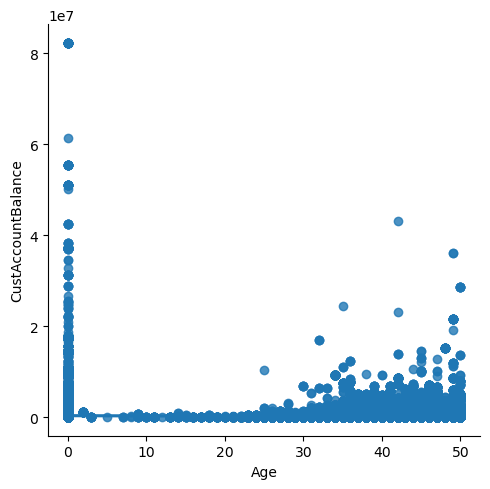

In [27]:
# Create a scatterplot for the "Age" and "CustAccountBalance" columns in seaborn
sns.lmplot(x = 'Age', y = 'CustAccountBalance', data = df_bank)

In [ ]:
# Create a scatterplot for the "Age" and "TransactionAmount (INR)" columns in seaborn
sns.lmplot(x = 'Age', y = 'TransactionAmount (INR)', data = df_bank)

# Customers over 30 made more number of transactions ,expensive purchases and had higher account balances at the time of the transaction.
# Customers with an age non disclosure  are represented as 0.

In [ ]:
# Create a scatterplot for the "month of transaction" and "TransactionAmount (INR)" columns in seaborn

sns.lmplot(x = 'month of transaction', y = 'TransactionAmount (INR)', data = df_bank)


# The frequency of transactions and the total spent are more in the month of August

# Pair Plots

# Categorical plots

In [ ]:
# Create a pair plot 
g = sns.pairplot(df_bank_sub)

In [ ]:
#  histogram to visualize the distribution of the variables.
sns.histplot(df_bank['month of transaction'], bins = 20, kde = True)
#argument "kde" add a line that encompasses the distribution

# More transactions were made in August  followed by September.

In [ ]:
#  histogram to visualize the distribution of the variables.
sns.histplot(df_bank['Age'], bins = 20, kde = True)
#argument "kde" add a line that encompasses the distribution

In [37]:
#  determine sensible categories for the months
df_bank.loc[df_bank['month of transaction']== 8 , 'Month_spend'] = 'High spending Month'
df_bank.loc[df_bank['month of transaction'].isin([1,9]), 'Month_spend'] = 'Medium spending Month'
df_bank.loc[df_bank['month of transaction'].isin ([2,3,4,5,6,7,10,11,12]), 'Month_spend']= 'Low spending Month'


In [38]:
df_bank['month of transaction'].value_counts(dropna=False)

8     271224
9      99373
10     32239
7      30636
3      30002
4      29941
11     29673
6      29304
2      27540
1      27066
12     26841
5      26465
Name: month of transaction, dtype: int64

In [41]:
df_bank['Month_spend'].value_counts(dropna=False)

High spending Month      247342
Low spending Month       241439
Medium spending Month    171523
Name: Month_spend, dtype: int64

In [42]:
df_bank['Age'].value_counts(dropna=False)

0     94222
33    44583
32    43182
34    42720
31    39465
35    39433
36    37080
37    33302
30    31028
38    30404
39    27375
40    23265
41    21920
29    21020
42    18792
43    16232
44    15577
45    13234
46    11617
28    11560
47    10065
48     8498
49     7059
27     6448
50     6416
26     3631
25     1208
24      416
23      146
21       79
22       74
18       46
19       31
16       23
2        22
20       20
17       17
11       16
13       16
9        15
14       14
3         9
15        9
10        8
7         4
12        1
8         1
5         1
Name: Age, dtype: int64

In [ ]:
df_bank.dtypes

In [39]:
#  create agegroup
df_bank.loc[(df_bank['Age']>=0 )& (df_bank['Age']<=18 ) , 'Age_Group'] = '0-18'
df_bank.loc[(df_bank['Age']>18 )& (df_bank['Age']<=25 ) , 'Age_Group'] = '19-25'
df_bank.loc[(df_bank['Age']>25 )& (df_bank['Age']<=35 ) , 'Age_Group'] = '26-35'
df_bank.loc[(df_bank['Age']>=36 )& (df_bank['Age']<45 ) , 'Age_Group'] = '36-45'
df_bank.loc[(df_bank['Age']>=45 ), 'Age_Group'] = '45+'

In [40]:
df_bank['Age_Group'].value_counts(dropna=False).sort_index()

0-18      94424
19-25      1974
26-35    283070
36-45    223947
45+       56889
Name: Age_Group, dtype: int64

In [ ]:
#Create a categorical plot in seaborn using the month spend categories
# order_agebin = pd.value_counts(df_bank['Age_Group']).sort_index().index
sns.set(style="ticks")
# g1 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="Month_spend", data=df_bank,order = order_agebin)
g1 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="Month_spend", data=df_bank,order =['0-18', '19-25', '26-35', '36-45', '45+'])

In [ ]:
# order_agebin

In [41]:
#  determine sensible categories for the age
df_bank.loc[(df_bank['Age']>=0 )& (df_bank['Age']<30 ) , 'Age_Category'] = 'Low spenders'
df_bank.loc[(df_bank['Age']>=30 )& (df_bank['Age']<40 ) , 'Age_Category'] = 'High spenders'
df_bank.loc[(df_bank['Age']>=40 ) , 'Age_Category'] = 'Medium spenders'

In [42]:
df_bank.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'Age',
       'month of transaction', 'Trans_monthname', 'Month_spend', 'Age_Group',
       'Age_Category'],
      dtype='object')

In [ ]:
# Create a categorical plot in seaborn using age categories
sns.set(style="ticks")
g2 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="Age_Category", data=df_bank, order =['0-18', '19-25', '26-35', '36-45', '45+'])

# The age group of 26 to 35 has the most high spenders, followed by those aged 36 to 45.
# Low-spending individuals are younger than 25. 

In [ ]:
# Create a categorical plot in seaborn using the gender categories
sns.set(style="ticks")
g3 = sns.catplot(x="Age_Group", y="TransactionAmount (INR)", hue="CustGender", data=df_bank,order =['0-18', '19-25', '26-35', '36-45', '45+'])

In [ ]:
sns.set(style="ticks")
g4 = sns.catplot(x="Age_Group", y="CustAccountBalance", hue="CustGender", data=df_bank,order =['0-18', '19-25', '26-35', '36-45', '45+'])

# Customers with Gender nondisclosure are represented as 0.

In [ ]:
sns.set(style="ticks")
g5 = sns.catplot(x="CustGender", y="TransactionAmount (INR)", hue="Age_Group", data=df_bank,order =['F', 'M'])

# Male customers have marginally higher account balances or number of transactions in comparison to  female customers.

In [43]:
df_bank.to_csv(os.path.join(path,'Data','Prepared Data','Bank Transactions 1.csv'),index=False)

In [44]:
df_bank.to_pickle(os.path.join(path,'Data','Prepared Data','Bank Transactions 1.pkl'))